EVALUACIÓN MÓDULO 3 : PROBLEMA 3

En el archivo crime_data.csv se encuentra el número de crímenes por cada 100.000 habitantes en cada uno de los estados de Estados Unidos, así como el porcentaje de la población que es urbana. Los crímenes se han agrupado en: asalto, asesinato y violación.

Segmenta este conjunto de datos utilizando k-means y obtén los centroides de cada clúster y el listado de los estados en cada uno de los clústeres. Para ello, se ha de encontrar el número óptimo de clúster en el que se divide el conjunto de datos.

In [1]:
%pylab
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


Para resolver el problema en primer lugar se ha de cargar el archivo con pandas.

In [2]:
import pandas as pd

crime = pd.read_csv('crime_data.csv', sep = ',')
crime.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


Ahora se han de eliminar las variables que no se van a utilizar para la segmentación, en esta ocasión el nombre del Estado correspondiente. Por lo que se crea una nueva variable crime_data para usar posteriormente.

In [3]:
col_names = list(crime.columns)
col_names.remove('State')

crime_data = crime[col_names]

Para seleccionar el número de clústeres en los que se dividen los Estados se puede utilizar el método de la silueta.

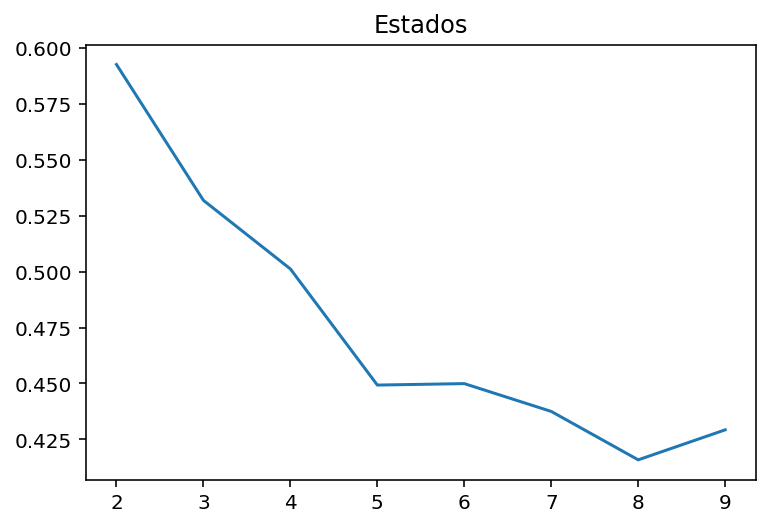

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

def plot_sillhouette(blobs, figure_name, max_k = 10, n_init = 10):
    sillhouette_avgs = []
    
    for k in range(2, max_k):
        kmean = KMeans(n_clusters = k, n_init = n_init).fit(blobs)
        sillhouette_avgs.append(silhouette_score(blobs, kmean.labels_))
        
    plot(range(2, max_k), sillhouette_avgs)
    title(figure_name)
    
plot_sillhouette(crime_data, 'Estados')

Puesto que el método de la silueta no deja demasiado claro el número de clústeres a seleccionar , usamos el método de la dispersión para asegurarnos:

In [6]:
import matplotlib.pyplot as plt

def plot_dispersion(x, figure_name, max_k = 10, n_init = 10):
    inertia = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k, n_init = n_init).fit(x)
        inertia.append(kmeans.inertia_)

    plt.plot(range(1, max_k), inertia, 'bx-')
    plt.xlabel('k')
    plt.ylabel(u'Dispersión')
    plt.title(figure_name)

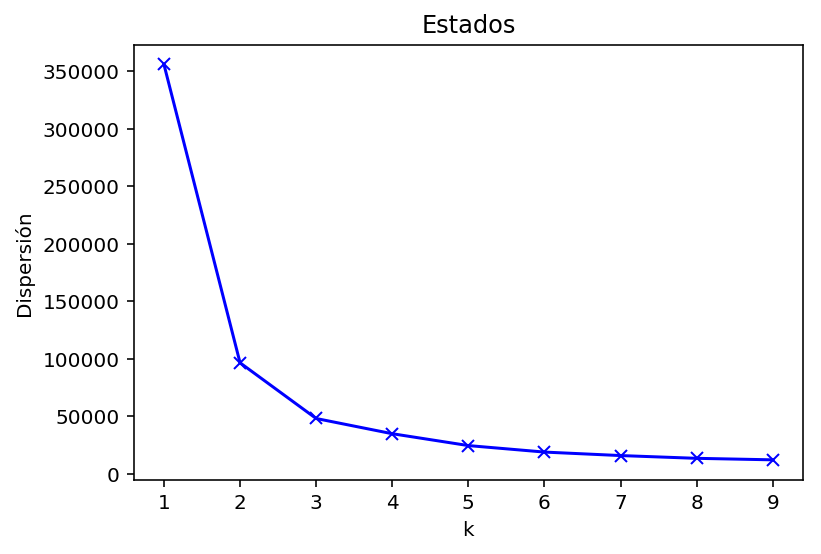

In [8]:
plot_dispersion(crime_data, 'Estados')

Parece claro que el número de clústeres adecuado es 3 puesto que el método de la dispersión muestra el principal codo con k=3.Procedemos al ajuste con KMeans. Una vez ajustado el modelo se puede imprimir las propiedades de los diferentes clústeres.

In [9]:
kmeans = KMeans(n_clusters = 3, n_init = 10).fit(crime_data)
kmeans.cluster_centers_

array([[  4.27      ,  87.55      ,  59.75      ,  14.39      ],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714]])

Como nos pide el enunciado del problema , hemos obtenido los centroides de los 3 clústeres y ahora segmentamos los Estados por clúster

In [10]:
clust = kmeans.predict(crime_data)

for i in range(max(clust) + 1):
    print ("Cluster", i)
    print (crime["State"][clust == i])

Cluster 0
6       Connecticut
10           Hawaii
11            Idaho
13          Indiana
14             Iowa
15           Kansas
16         Kentucky
18            Maine
22        Minnesota
25          Montana
26         Nebraska
28    New Hampshire
33     North Dakota
34             Ohio
37     Pennsylvania
40     South Dakota
43             Utah
44          Vermont
47    West Virginia
48        Wisconsin
Name: State, dtype: object
Cluster 1
0            Alabama
1             Alaska
2            Arizona
4         California
7           Delaware
8            Florida
12          Illinois
17         Louisiana
19          Maryland
21          Michigan
23       Mississippi
27            Nevada
30        New Mexico
31          New York
32    North Carolina
39    South Carolina
Name: State, dtype: object
Cluster 2
3          Arkansas
5          Colorado
9           Georgia
20    Massachusetts
24         Missouri
29       New Jersey
35         Oklahoma
36           Oregon
38     Rhode Island
